In [159]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score
import pandas as pd

In [160]:
df = pd.read_csv("data.csv", sep=";")
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# Sigmoid

## Encode target

In [161]:
def encode_target(value):
    if value == "Enroll" or value == "Dropout":
        return 0
    
    return 1

In [162]:
df1 = df.copy()

df1["Target"] = df["Target"].apply(encode_target)

In [163]:
df1.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


## Defining the input and output vector

In [164]:
X = df1.iloc[:, :-1]  
y = df1.iloc[:, -1]   

# Chia tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Normalizing

In [165]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model

In [166]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [167]:
# Khởi tạo Logistic Regression với warm_start để lưu loss qua từng epoch
log_reg = LogisticRegression(max_iter=1, warm_start=True)  

losses = []
epochs = 50  # Số epoch mong muốn

In [168]:
# Training
for epoch in range(epochs):
    log_reg.fit(X_train, y_train)  # Train từng epoch một
    y_prob = log_reg.predict_proba(X_train)[:, 1]  # Xác suất của lớp 1
    loss = log_loss(y_train, y_prob)  # Tính loss theo hàm log-loss
    losses.append(loss)

In [169]:
# Dự đoán trên tập test
y_pred = log_reg.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

Accuracy: 0.8667


## Visualizing

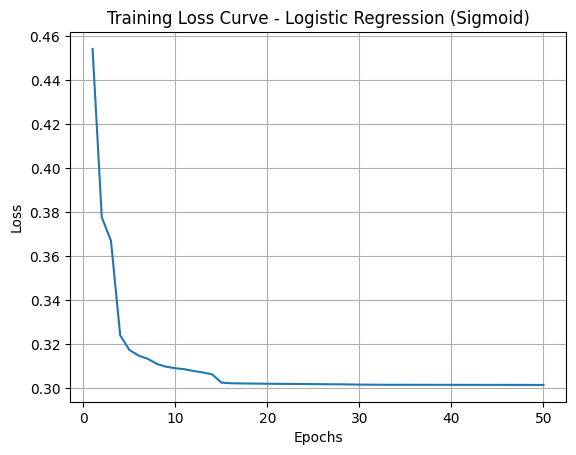

In [170]:
# Vẽ đồ thị Loss qua từng epoch
plt.plot(range(1, epochs + 1), losses, label = "Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve - Logistic Regression (Sigmoid)")
plt.grid()
plt.show()


# Softmax

## Encoding target

In [171]:
def encode_target_softmax(value):
    if value == "Enrolled":
        return (1, 0, 0)
    if value == "Dropout":
        return (0, 1, 0)
    return (0, 0, 1)


In [172]:
df2 = df.copy()
df2["Target"] = df["Target"].apply(encode_target)

df2.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


# Defining input and output vector

In [173]:
X = df2.iloc[:, :-1] 
y = df2.iloc[:, -1]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Normalizing

In [174]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model

In [175]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1, warm_start=True)

losses = []
epochs = 50  

In [176]:
# training
for epoch in range(epochs):
    softmax_reg.fit(X_train, y_train)  # Train từng epoch một
    y_prob = softmax_reg.predict_proba(X_train)  # Xác suất của từng lớp
    loss = log_loss(y_train, y_prob)  # Tính cross-entropy loss
    losses.append(loss)

In [177]:
# predict
y_pred = softmax_reg.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

Accuracy: 0.8678


## Visualizing

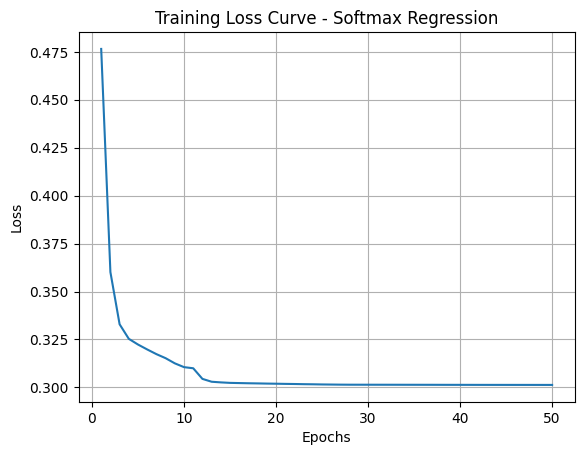

In [178]:
plt.plot(range(1, epochs + 1), losses, label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve - Softmax Regression")
plt.grid()
plt.show()
